<a href="https://colab.research.google.com/github/kalmuroth/python-exo/blob/master/Analyse_Donn%C3%A9e_WOW_2008_LB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nous allons étudier des données qui correspondent aux connexion de personnages-joueurs dans le jeu-vidéo World Of Warcraft sur un serveur en 2008.

Chaque row dans le fichier .csv correspond à une connexion quotidienne d'un joueur.

Sur un axe de 1 ans (année 2008), nous avons un total de 10 millions de connexion.

Je vais utiliser les librairies Python Pandas/Numpy/Seaborn pour étudier et analyser ces données visuellement pour démontrer l'impact de l'extension sur les joueurs.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import gc
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!ls


Mounted at /content/drive
drive  sample_data


# Préparer les données <a id="1"></a>

### Fichier en entrée <a id="2"></a>

In [4]:
print('%-33s %d' % ('Nombre de Fichier .csv :', len(os.listdir('./drive/MyDrive/input'))))
for i in range(34):
    print('-',end='')
print('-')
for file in os.listdir("./drive/MyDrive/input"):
    unit = 'MB'
    size = os.stat('./drive/MyDrive/input/' + file).st_size
    if round(size / 2**20, 2) < 0.5:
        size = round(size / 2**10, 2)
        unit = 'KB'
    else:
        size = round(size / 2**20, 2)
    print('%-25s %6.2f %2s' % (file, size, unit))

Nombre de Fichier .csv :          1
-----------------------------------
wowah_data.csv            623.93 MB


# Présentation des données <a id="1"></a>

### Les Joueurs <a id="2"></a>

On va commencer par quelque chose de simple, regarder un peu ce que représente un row dans nos données (+ on modifie un peu le dataframe).

In [11]:
timeData = pd.read_csv('./drive/MyDrive/input/wowah_data.csv', sep = ',', skipinitialspace=True);
timeData["timestamp"] = timeData["timestamp"].str.split(' ').str[0] 
timeData["month"] = timeData["timestamp"].str[:2]
timeData.head()

,char,level,race,charclass,zone,guild,timestamp,month
0,59425,1,Orc,Rogue,Orgrimmar,165,01/01/08,01
1,65494,9,Orc,Hunter,Durotar,-1,01/01/08,01
2,65325,14,Orc,Warrior,Ghostlands,-1,01/01/08,01
3,65490,18,Orc,Hunter,Ghostlands,-1,01/01/08,01
4,2288,60,Orc,Hunter,Hellfire Peninsula,-1,01/01/08,01


Chaque ligne représente la connexion d'un joueur sur son personnage. 
Seulement la première connexion quotidienne a été enregistrer.

Timestamp représente le moment où le joueur s'est connecté la première fois dans la journée.

In [6]:
timeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10826734 entries, 0 to 10826733
Data columns (total 7 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   char       int64 
 1   level      int64 
 2   race       object
 3   charclass  object
 4   zone       object
 5   guild      int64 
 6   timestamp  object
dtypes: int64(3), object(4)
memory usage: 578.2+ MB


Si on compte le total d'utilisateur qui s'est connecté par mois, nous pouvons déterminer le total de connexion mensuelle.

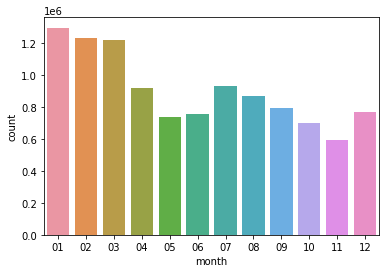

In [26]:
sns.countplot(x="month",data=timeData)